# INSAID TASK ROUND

## NAME OF THE CANDIDATE: RISHABH SINGH


 



<center><h2>Predicting Fraudulent Transactions </h2> </center>

## Model Elaboration:
<ul>
    <li>For Dataset preprocessing, we have mapped the type of transaction as 0,1,2,3,4 and droped the columns of Names.</li>
    <li>We have chosen 3 Machine Leanring Algorithms:- KNN, SVM and Logistic Regression.</li>
    <li>Since this a huge dataset, for training and testing the model we have chosen a small portion of the dataset. </li>
    <li>Since this is an imbalanced dataset, the best way to check the quality of the results, we choose confusion matrix(as a heatmap) and classification report as metrics.</li>

</ul>

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report

## Loading Dataset

In [29]:
df_fraud=pd.read_csv("Fraud.csv")
df_fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [30]:
df_fraud.dtypes #Cheking the Datatype of each attribute

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [31]:
df_fraud.isnull().sum() ##Checking for Null Values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [32]:
df_fraud["isFraud"].value_counts(normalize=True)

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

In [33]:
df_fraud["isFlaggedFraud"].value_counts(normalize=True)

0    0.999997
1    0.000003
Name: isFlaggedFraud, dtype: float64

In [34]:
df_fraud.groupby("type")["isFraud"].value_counts()

type      isFraud
CASH_IN   0          1399284
CASH_OUT  0          2233384
          1             4116
DEBIT     0            41432
PAYMENT   0          2151495
TRANSFER  0           528812
          1             4097
Name: isFraud, dtype: int64

In [35]:
df_fraud.groupby("type")["isFlaggedFraud"].value_counts()

type      isFlaggedFraud
CASH_IN   0                 1399284
CASH_OUT  0                 2237500
DEBIT     0                   41432
PAYMENT   0                 2151495
TRANSFER  0                  532893
          1                      16
Name: isFlaggedFraud, dtype: int64

## Data Visualization & Feature Selection

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


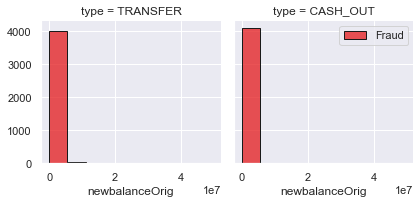

In [39]:
df_fraud_ac=df_fraud[df_fraud["isFraud"]==1]
df_fraud_ac["isFraud"].replace(1,"Fraud",inplace=True)
bins=np.linspace(df_fraud_ac["newbalanceOrig"].min(),df_fraud_ac["newbalanceOrig"].max(),10)
sns.set()
g=sns.FacetGrid(df_fraud_ac,col="type",hue="isFraud",palette="Set1",col_wrap=2)
g.map(sns.histplot,"newbalanceOrig",bins=bins,ec="k")
plt.legend()
plt.savefig("Figure1.png")
plt.show()

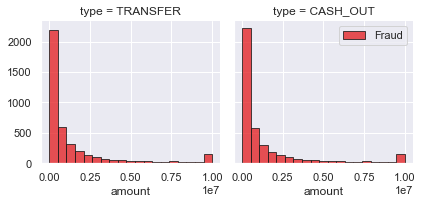

In [40]:
bins_amt=np.linspace(df_fraud_ac["amount"].min(),df_fraud_ac["amount"].max(),20)
sns.set()
g=sns.FacetGrid(df_fraud_ac,col="type",hue="isFraud",palette="Set1",col_wrap=2)
g.map(sns.histplot,"amount",bins=bins_amt,ec="k")
plt.legend()
plt.savefig("Figure3.png")
plt.show()

In [41]:
df_fraud.corr()["isFraud"]

step              0.031578
amount            0.076688
oldbalanceOrg     0.010154
newbalanceOrig   -0.008148
oldbalanceDest   -0.005885
newbalanceDest    0.000535
isFraud           1.000000
isFlaggedFraud    0.044109
Name: isFraud, dtype: float64

In [42]:
df_fraud["type"].replace(to_replace=["CASH_IN","DEBIT","PAYMENT","TRANSFER","CASH_OUT"],value=[0,1,2,3,4],inplace=True)

## Key Factors to Predict Fraudulent Customers
<p> <b>Step</b>, <b>Type</b>, <b>Amount</b>, <b>OldbalanceOrg</b> and <b>NewbalanceOrig</b> are key factors to identify fraudulent Customers because these features have the most influence for a transaction to be fradulent. For example, if we take "Type" we can see only "Transfer" and "Cash-out" have the fradulent transactions, thus to detect/identify a fraud, we can take extra care of the type of transaction </p>

In [43]:
Feature=df_fraud[["step","type","amount","oldbalanceOrg","newbalanceOrig"]]
Feature

,step,type,amount,oldbalanceOrg,newbalanceOrig
0,1,2,9839.64,170136.00,160296.36
1,1,2,1864.28,21249.00,19384.72
2,1,3,181.00,181.00,0.00
3,1,4,181.00,181.00,0.00
4,1,2,11668.14,41554.00,29885.86
...,...,...,...,...,...
6362615,743,4,339682.13,339682.13,0.00
6362616,743,3,6311409.28,6311409.28,0.00
6362617,743,4,6311409.28,6311409.28,0.00
6362618,743,3,850002.52,850002.52,0.00


## Creation of Model

In [44]:
Eval_Data=np.array(df_fraud.sample(frac=0.03)[["step","type","amount","oldbalanceOrg","newbalanceOrig","isFraud"]])
X=Eval_Data[:,0:5]
Y=Eval_Data[:,-1]
transform= StandardScaler()
X_transform=transform.fit_transform(X)
X_train,X_test,Y_train,Y_test=train_test_split(X_transform,Y,random_state=2,test_size=0.3)

### Logistic Regresssion

In [45]:
from sklearn.linear_model import LogisticRegression
clf_log=LogisticRegression()
clf_log.fit(X_train,Y_train)
Y_pred_log=clf_log.predict(X_test)
print("Score of Logistic Regression:","%.2f"%(100*clf_log.score(X_test,Y_test)))

Score of Logistic Regression: 99.90


### KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn= KNeighborsClassifier()
clf_knn.fit(X_train,Y_train)
Y_pred_knn=clf_knn.predict(X_test)
print("Score of KNN:","%.2f"%(100*clf_knn.score(X_test,Y_test)))

Score of KNN: 99.90


### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
clf_svm= SVC()
clf_svm.fit(X_train,Y_train)
Y_pred_svm=clf_svm.predict(X_test)
print("Score of Support Vector Machine:","%.2f"%(100*clf_svm.score(X_test,Y_test)))

## Confusion Matrix and Classification Report for each algorithm

In [48]:
def plot_confusion_matrix(Y_true,Y_pred,NameofTheAlgorithm="Logistic Regression"):
    cm=confusion_matrix(Y_true,Y_pred)
    figure=plt.figure(figsize=(10,11))
    sns.heatmap(cm,annot=True,fmt="d",xticklabels=["Non-Fraud","Fraud"],yticklabels=["Non-Fraud","Fraud"])
    plt.xlabel("Predicted Values",fontsize=15)
    plt.ylabel("Actual Values",fontsize=15)
    plt.title("Confusion Matrix for Fraud Detection("+NameofTheAlgorithm+")",fontsize=20)
    plt.savefig("Confusion Matrix for Fraud Detection("+NameofTheAlgorithm+")")
    plt.show()

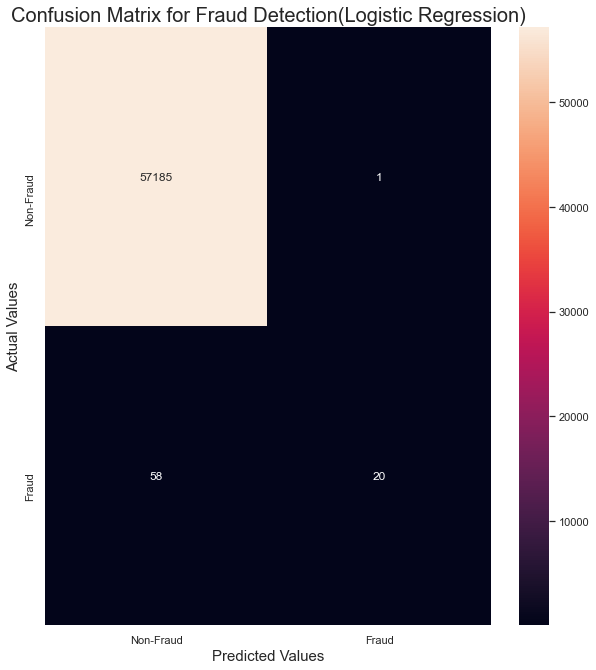

In [49]:
 plot_confusion_matrix(Y_test,Y_pred_log,"Logistic Regression") 

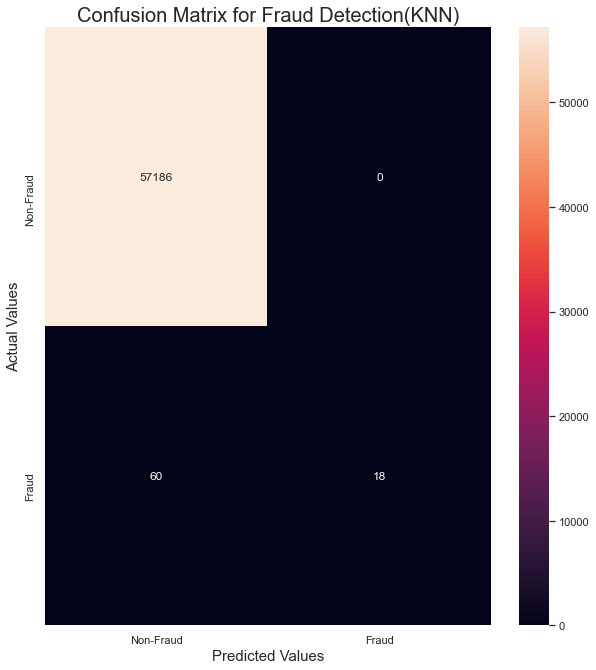

In [50]:
plot_confusion_matrix(Y_test,Y_pred_knn,"KNN")

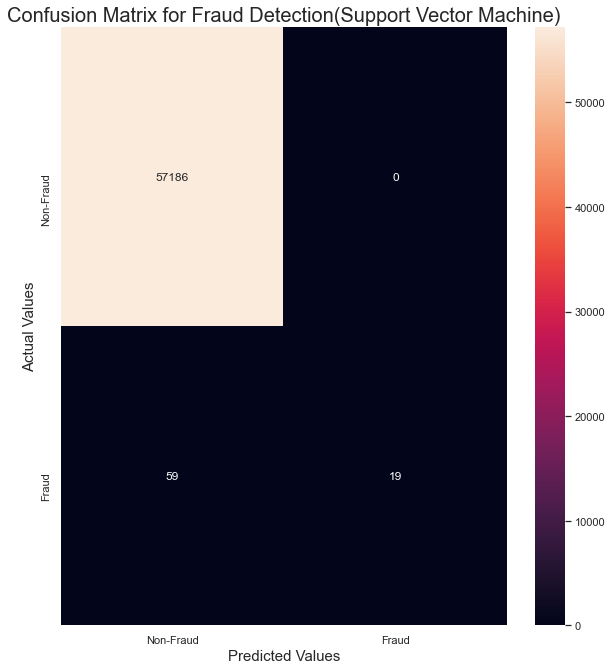

In [51]:
plot_confusion_matrix(Y_test,Y_pred_svm,"Support Vector Machine")

In [54]:
cr_log=classification_report(Y_test,Y_pred_log)
cr_svm=classification_report(Y_test,Y_pred_svm)
cr_knn=classification_report(Y_test,Y_pred_knn)

In [56]:
print(cr_log) ##Logistic Regression

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     57186
         1.0       0.95      0.26      0.40        78

    accuracy                           1.00     57264
   macro avg       0.98      0.63      0.70     57264
weighted avg       1.00      1.00      1.00     57264



In [57]:
print(cr_svm) ##Support Vector Machine

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     57186
         1.0       1.00      0.24      0.39        78

    accuracy                           1.00     57264
   macro avg       1.00      0.62      0.70     57264
weighted avg       1.00      1.00      1.00     57264



In [58]:
print(cr_knn) ##KNN

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     57186
         1.0       1.00      0.23      0.38        78

    accuracy                           1.00     57264
   macro avg       1.00      0.62      0.69     57264
weighted avg       1.00      1.00      1.00     57264



## A Few Solutions:
<ul>
    <li>We have seen that most of the frauds have taken place in Transfer and Cash-Out,so the company can take extra measures in the form strict checks. </li>
    <li>If the "newbalanceOrig" is nearing to 0.0 after the transaction, it needs to be flagged and checked thoroughly. </li>
    <li>Recommending Strong Credentials for the users.</li>
</ul>
